In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.distributions import chi2

Why do we always assume Gaussian noise in our data!? There must be some
explanation! The answer is the Central Limit Theorem. We will not go into any
detail, but it is easy to get some intuition using python/numpy! First, draw a vector of
random numbers from a uniform distribution and create a plot, like in Exercise Set 2
(just copy and paste your code!).

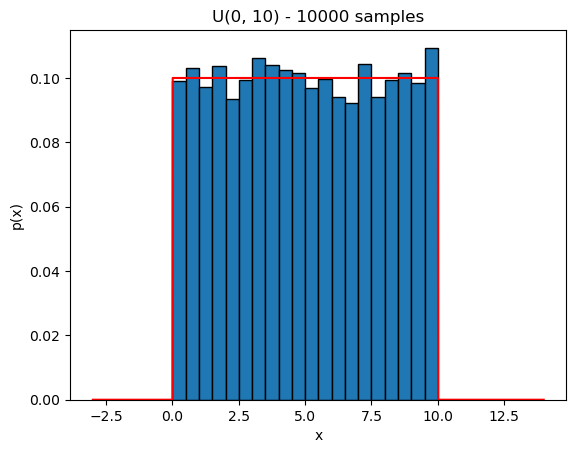

In [2]:
N = 10000
a = 0
b = 10

uniform_dist = np.random.uniform(a, b, N)

# histogram
n_bins = 20
plt.hist(uniform_dist, bins=n_bins, edgecolor='black', density=True, stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'U({a}, {b}) - {N} samples')


x = np.arange(a-3, b+4, 0.01)

# theoretical function
y = np.ones_like(x) * 1/(b-a)
y[x<a] = 0
y[x>b]=0

plt.plot(x,y, color='red')

Now, what happens if we take the sum of two random uniform variables instead? If
we have a random variable x that is the sum of two independent variables, i.e. $x=\sum_{i=1}^Kz_i$
, where $z=U(a,b)$ as before, and we’ll start with K=2. Make a
histogram of the distribution of x after taking ~10,000 samples

Text(0.5, 1.0, '')

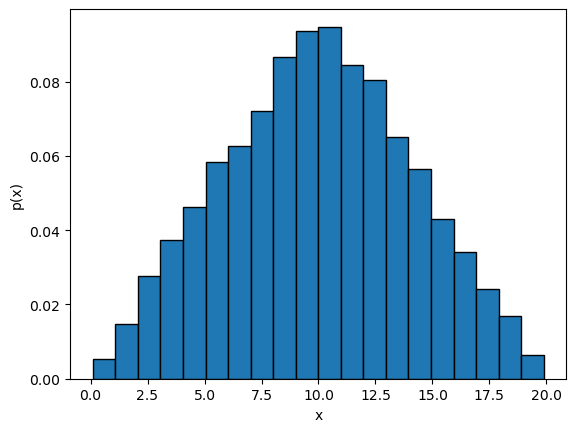

In [3]:
K = 2

# Create an (N,2) array of random numbers, then sum over the axis of length 2
x = np.random.uniform(a, b, (N,K))
x = np.sum(x, axis=1)

# histogram
n_bins = 20
plt.hist(x, bins=n_bins, edgecolor='black', density=True, stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('')

What happens to the distribution as you increase K? [Hint: It might help to divide the sum x by K to preserve the mean, if you plot on the same axis.]

Text(0.5, 1.0, '')

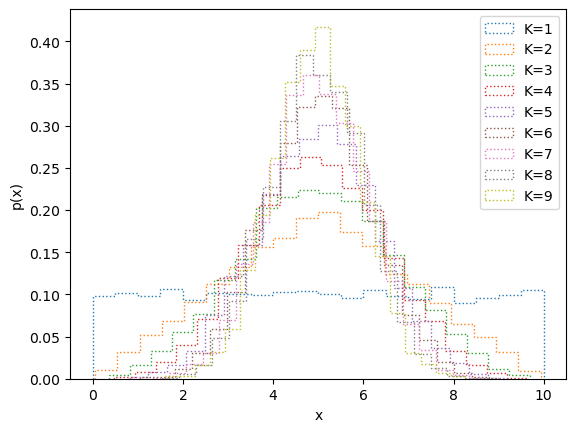

In [4]:
# An (N,K) array of random numbers, then sum over the axis of length K, and preserve the mean
for K in range(1,10):
    x = np.random.uniform(a, b, (N,K))
    x = np.sum(x, axis=1)/K

    # histogram
    n_bins = 20
    plt.hist(x, bins=n_bins, density=True, stacked=True,histtype="step", label=f'K={K}', linestyle='dotted')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.title('')

$\chi^2$ is an important ‘merit function’ for data analysis, which has an associated
probability distribution. Here we will explore the probability distribution by drawing
samples. First draw a vector of random numbers from a normal distribution with
mean zero and standard deviation 1, using your code from Exercise Set 2. Take the
square of the array/vector and plot the (normalised) histogram.

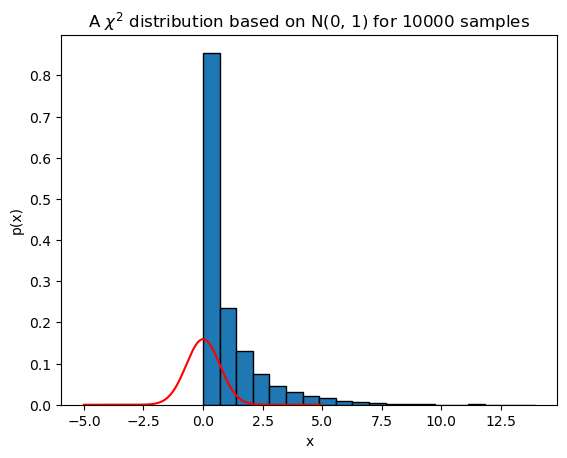

In [50]:
mu = 0
sigma = 1

squared_dist = np.random.normal(mu, sigma**2, N)**2

# histogram
plt.hist(squared_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'A $\chi^2$ distribution based on N({mu}, {sigma**2}) for {N} samples')

# theoretical function
def normal(mu, sigma, x):
    return 1/np.sqrt(2*np.pi * sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

x = np.arange(-sigma*5, sigma*5, 0.01)

y = normal(mu, sigma, x)**2

plt.plot(x,y, color='red')

The squared vector is a $\chi^2$ distribution with 1 degree of freedom (DoF). More
generally, if we take the sum of the squares of K normal distributed variables, we
have a $\chi^2$ distribution with K degrees of freedom. Mathematically, if $x=\sum_{i=1}^Kz_i^2$
where $z=N(0,1)$. Using similar methods as before, draw samples from a $\chi^2$ with
say, 5 DoF.

Text(0.5, 1.0, 'A reduced $\\chi^2$ distribution with 5 degrees of freedom based on N(0, 1) for 10000 samples')

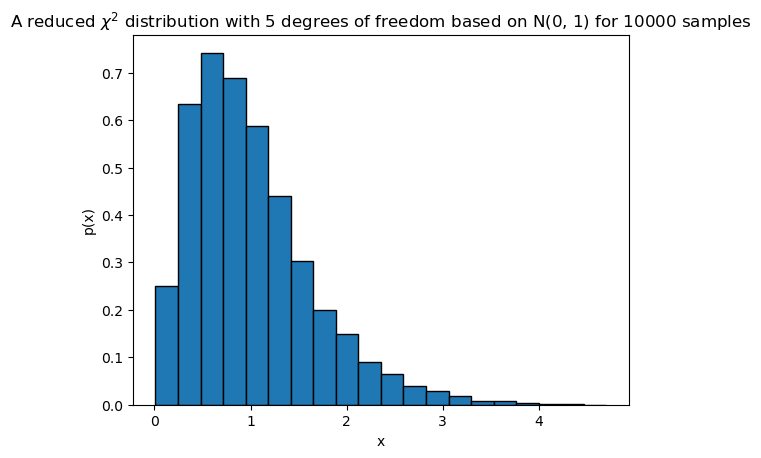

In [24]:
# An (N,K) array of random numbers, then sum over the axis of length K
K = 5

chi_dist = np.random.normal(mu, sigma**2, (N,K))**2
chi_dist = np.sum(chi_dist, axis=1)/K

# histogram
plt.hist(chi_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'A reduced $\chi^2$ distribution with {K} degrees of freedom based on N({mu}, {sigma**2}) for {N} samples')

Compare with the theoretical distribution, and for different DoF. What is the
expectation value for your distribution? The reduced $\chi^2$ is given by $\chi^2/K$. What is
the expectation value?

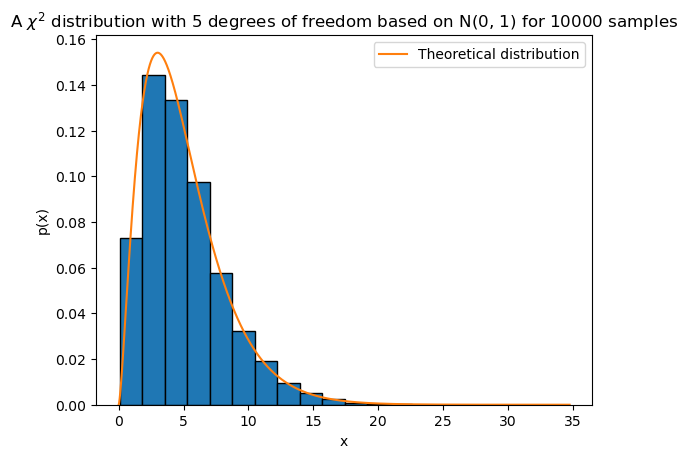

In [20]:
# Comparing with theoretical distribution

K = 5
# An (N,K) array of random numbers, then sum over the axis of length K
chi_dist = np.random.normal(mu, sigma**2, (N,K))
chi_dist = np.sum(chi_dist**2, axis=1)


# histogram
plt.hist(chi_dist, bins=n_bins, density=True, edgecolor='black', stacked=True)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'A $\chi^2$ distribution with {K} degrees of freedom based on N({mu}, {sigma**2}) for {N} samples')


x = np.linspace(0,max(chi_dist),10000)
y = chi2.pdf(x,K)

plt.plot(x,y, label='Theoretical distribution')

plt.legend()

(0.0, 1.0)

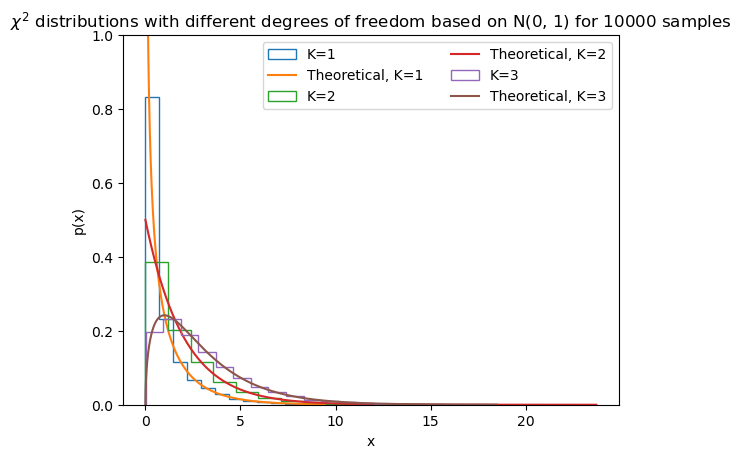

In [34]:
# Comparing with different values of K

for K in range(1,4):
    # An (N,K) array of random numbers, then sum over the axis of length K
    chi_dist = np.random.normal(mu, sigma**2, (N,K))
    chi_dist = np.sum(chi_dist**2, axis=1)
    plt.hist(chi_dist, bins=n_bins, density=True, stacked=True, histtype="step", label=f'K={K}')

    x = np.linspace(0,max(chi_dist),10000)
    y = chi2.pdf(x,K)

    plt.plot(x,y, label=f'Theoretical, K={K}')
    
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'$\chi^2$ distributions with different degrees of freedom based on N({mu}, {sigma**2}) for {N} samples')
plt.legend(ncols=2)
plt.ylim([0,1])

Expectation value for chi^2 with 1 degrees of freedom: 0.9749510918328106
Expectation value for chi^2 with 2 degrees of freedom: 2.0256358241812937
Expectation value for chi^2 with 3 degrees of freedom: 3.007035194911067
Expectation value for chi^2 with 4 degrees of freedom: 3.9537799028240546


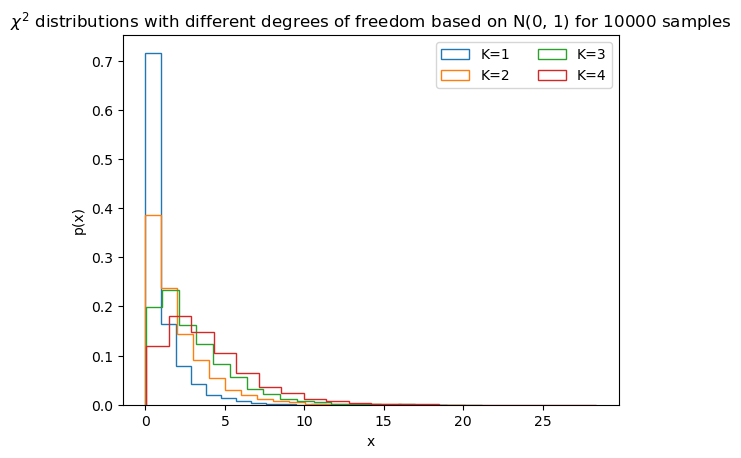

In [37]:
# Comparing with different values of K - expectation values


for K in range(1,5):
    # An (N,K) array of random numbers, then sum over the axis of length K
    chi_dist = np.random.normal(mu, sigma**2, (N,K))
    chi_dist = np.sum(chi_dist**2, axis=1)
    plt.hist(chi_dist, bins=n_bins, density=True, stacked=True, histtype="step", label=f'K={K}')
    
    expected = sum(chi_dist)/len(chi_dist)
    
    print(f"Expectation value for chi^2 with {K} degrees of freedom: {expected}")
    

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'$\chi^2$ distributions with different degrees of freedom based on N({mu}, {sigma**2}) for {N} samples')
plt.legend(ncols=2)

Expectation value for chi^2 with 1 degrees of freedom: 1.0147474700922507
Expectation value for chi^2 with 2 degrees of freedom: 0.9886244328861625
Expectation value for chi^2 with 3 degrees of freedom: 1.0096223262713433
Expectation value for chi^2 with 4 degrees of freedom: 1.0151281279392834


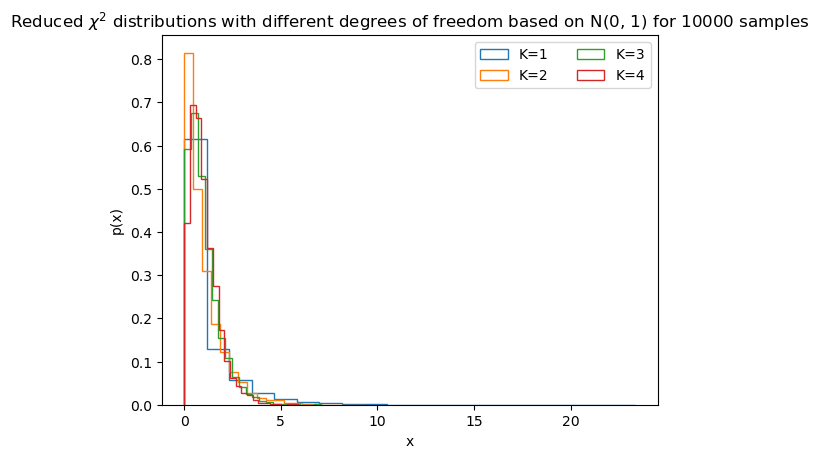

In [38]:
# Comparing with different values of K - expectation values - reduced dist


for K in range(1,5):
    # An (N,K) array of random numbers, then sum over the axis of length K
    chi_dist = np.random.normal(mu, sigma**2, (N,K))
    chi_dist = np.sum(chi_dist**2, axis=1)/K
    plt.hist(chi_dist, bins=n_bins, density=True, stacked=True, histtype="step", label=f'K={K}')
    
    expected = sum(chi_dist)/len(chi_dist)
    
    print(f"Expectation value for chi^2 with {K} degrees of freedom: {expected}")
    

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'Reduced $\chi^2$ distributions with different degrees of freedom based on N({mu}, {sigma**2}) for {N} samples')
plt.legend(ncols=2)

You’re all familiar with the ‘standard’ propagation of uncertainties formulae. e.g. for
two variables A and B with corresponding uncertainties $\sigma_A$ and $\sigma_B$, we have ...

These expressions are only approximations, and derived (typically) using a Taylor
expansion of a function. Show numerically that these expressions work, by
generating random draws for A and B, then computing and comparing to the
theoretical distributions

In [129]:
N = 10000

# Generate A and B
mu_A = 5
mu_B = 7
sigma_A = 2
sigma_B = 1

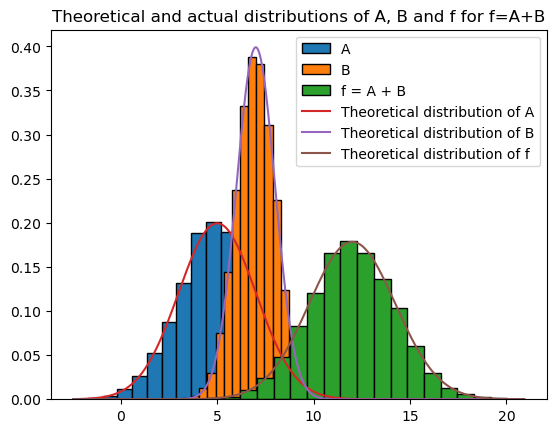

In [141]:
A = np.random.normal(mu_A, sigma_A, N)
B = np.random.normal(mu_B, sigma_B, N)

# Generate f
f = A + B

# Plot each distribution
plt.hist(A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='B')
plt.hist(f, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A + B')

x = np.linspace(min(min(A), min(B), min(f)), max(max(A), max(B), max(f)), 10000)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_B, sigma_B, x), label='Theoretical distribution of B')
plt.plot(x, normal(mu_B + mu_A, np.sqrt( sigma_A**2 + sigma_B**2), x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A, B and f for f=A+B')
plt.legend()

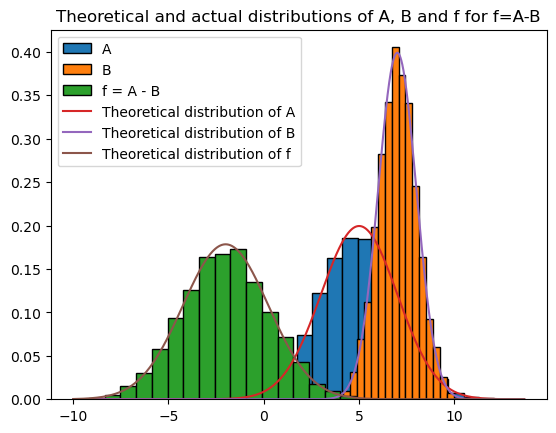

In [142]:
A = np.random.normal(mu_A, sigma_A, N)
B = np.random.normal(mu_B, sigma_B, N)

# Generate f
f = A - B

# Plot each distribution
plt.hist(A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='B')
plt.hist(f, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A - B')

x = np.linspace(min(min(A), min(B), min(f)), max(max(A), max(B), max(f)), 10000)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_B, sigma_B, x), label='Theoretical distribution of B')
plt.plot(x, normal(mu_A - mu_B, np.sqrt(sigma_A**2 + sigma_B**2), x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A, B and f for f=A-B')
plt.legend()

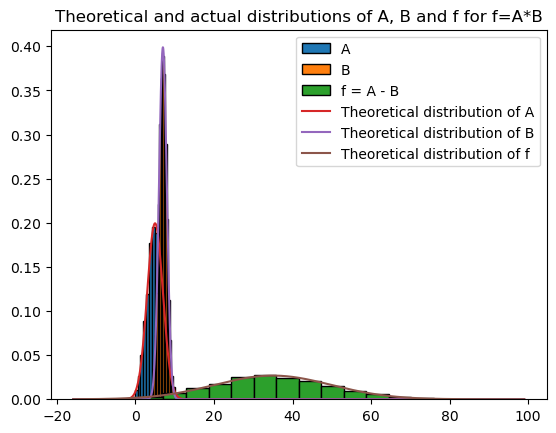

In [147]:
A = np.random.normal(mu_A, sigma_A, N)
B = np.random.normal(mu_B, sigma_B, N)

# Generate f
f = A * B

# Plot each distribution
plt.hist(A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='B')
plt.hist(f, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A - B')

x = np.linspace(min(min(A), min(B), min(f)), max(max(A), max(B), max(f)), 10000)

mu_f = mu_A * mu_B
sigma_f = mu_f* np.sqrt((sigma_A/mu_A)**2 + (sigma_B/mu_B)**2)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_B, sigma_B, x), label='Theoretical distribution of B')
plt.plot(x, normal(mu_f, sigma_f, x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A, B and f for f=A*B')
plt.legend()

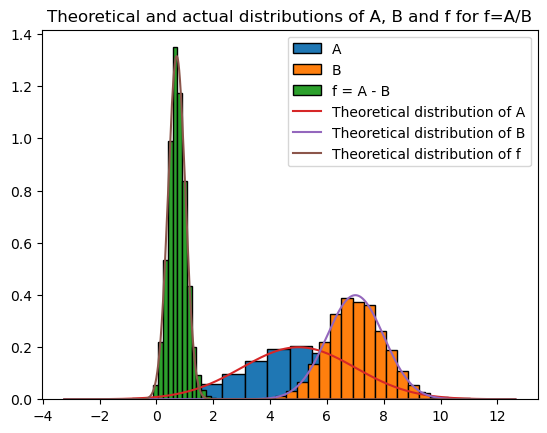

In [146]:
A = np.random.normal(mu_A, sigma_A, N)
B = np.random.normal(mu_B, sigma_B, N)

# Generate f
f = A / B

# Plot each distribution
plt.hist(A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='B')
plt.hist(f, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A - B')

x = np.linspace(min(min(A), min(B), min(f)), max(max(A), max(B), max(f)), 10000)

mu_f = mu_A / mu_B
sigma_f = mu_f* np.sqrt((sigma_A/mu_A)**2 + (sigma_B/mu_B)**2)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_B, sigma_B, x), label='Theoretical distribution of B')
plt.plot(x, normal(mu_f, sigma_f, x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A, B and f for f=A/B')
plt.legend()

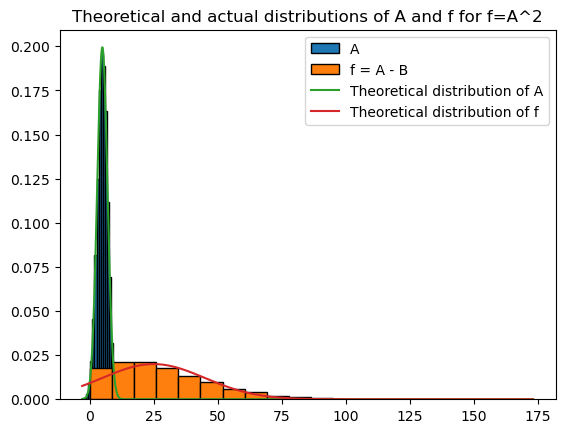

In [150]:
A = np.random.normal(mu_A, sigma_A, N)

# Generate f
f = A ** 2

# Plot each distribution
plt.hist(A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(f, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A - B')

x = np.linspace(min(min(A), min(B), min(f)), max(max(A), max(B), max(f)), 10000)

mu_f = mu_A ** 2
sigma_f = mu_f * 2 * (sigma_A/mu_A)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_f, sigma_f, x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A and f for f=A^2')
plt.legend()

In the case of adding two variables, this can also be seen as a convolution of two
probability distributions. Use the np.convolve function to show that this is the case

(-100.0, 100.0)

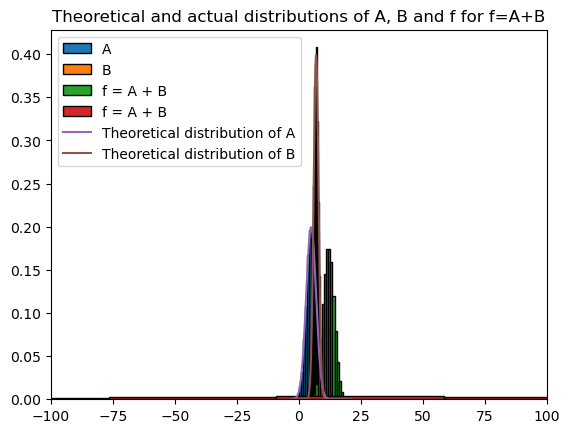

In [167]:
A = np.random.normal(0, sigma_A, N)
B = np.random.normal(0, sigma_B, N)

# Generate f
f = A + B

convolve_f = np.convolve(A,B)

# Plot each distribution
plt.hist(A+mu_A, bins=n_bins, density=True, edgecolor='black', stacked=True, label='A')
plt.hist(B+mu_B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='B')
plt.hist(f+mu_A+mu_B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A + B')

plt.hist(convolve_f+mu_A+mu_B, bins=n_bins, density=True, edgecolor='black', stacked=True, label='f = A + B')


x = np.linspace(min(min(A+mu_A), min(B+mu_B), min(f+mu_A+mu_B)), max(max(A+mu_A), max(B+mu_B), max(f+mu_A+mu_B)), 10000)

plt.plot(x, normal(mu_A, sigma_A, x), label='Theoretical distribution of A')
plt.plot(x, normal(mu_B, sigma_B, x), label='Theoretical distribution of B')
#plt.plot(x, normal(mu_B + mu_A, sigma_f, x), label='Theoretical distribution of f')

plt.title('Theoretical and actual distributions of A, B and f for f=A+B')
plt.legend()
plt.xlim([-100,100])